# KMeans and DBSCAN

### Load libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')

# The differences between KMeans and DBSCAN:
Unlike k-means, DBSCAN will figure out the number of clusters. DBSCAN works by determining whether the minimum number of points are close enough to one another to be considered part of a single cluster. DBSCAN is very sensitive to scale since epsilon is a fixed value for the maximum distance between two points.


### Load iris data


In [2]:
iris = load_iris()
X = iris.data
labels_true = iris.target
X = StandardScaler().fit_transform(X)

### K-Means

#### - K-means need the number of clusters hidden in the dataset but DBScan doesn’t.

In [3]:
def acc_KM(X,labels_true, labels):
    # Homogeneity
    hmgnty = metrics.homogeneity_score(labels_true, labels)
    print('Homogeneity = ', hmgnty)
    
    # Completeness
    cmpltnss = metrics.completeness_score(labels_true, labels)
    print('Completeness = ', cmpltnss)
    
    # V-measure
    vmeasr = metrics.v_measure_score(labels_true, labels)
    print('V_measure = ', vmeasr)
    
    # Adjusted Rand Index
    adjrnd = metrics.adjusted_rand_score(labels_true, labels)
    print('Adjusted rand = ', adjrnd)
    
    # Adjusted Mutual Information
    mutinfo = metrics.adjusted_mutual_info_score(labels_true, labels)
    print('Adjusted Mutual Information',mutinfo)
    
    # Silhouette
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
    print('---------------------------------------------------')

### K-Means Clustring result

Homogeneity =  0.5793801642856945
Completeness =  0.9999999999999997
V_measure =  0.7336804366512104
Adjusted rand =  0.5681159420289855
Adjusted Mutual Information 0.7315847607219572
Silhouette Coefficient: 0.582
---------------------------------------------------
Homogeneity =  0.6412509939057986
Completeness =  0.6440718321615102
V_measure =  0.6426583176523606
Adjusted rand =  0.5923326221845838
Adjusted Mutual Information 0.6381753284020907
Silhouette Coefficient: 0.463
---------------------------------------------------
Homogeneity =  0.6412509939057986
Completeness =  0.5318550888665203
V_measure =  0.5814522818661504
Adjusted rand =  0.4420520501778693
Adjusted Mutual Information 0.5742322350752407
Silhouette Coefficient: 0.386
---------------------------------------------------
Homogeneity =  0.7149866659168685
Completeness =  0.5020086955307155
V_measure =  0.5898617773725043
Adjusted rand =  0.4204810300834166
Adjusted Mutual Information 0.581211307434757
Silhouette Coeffici

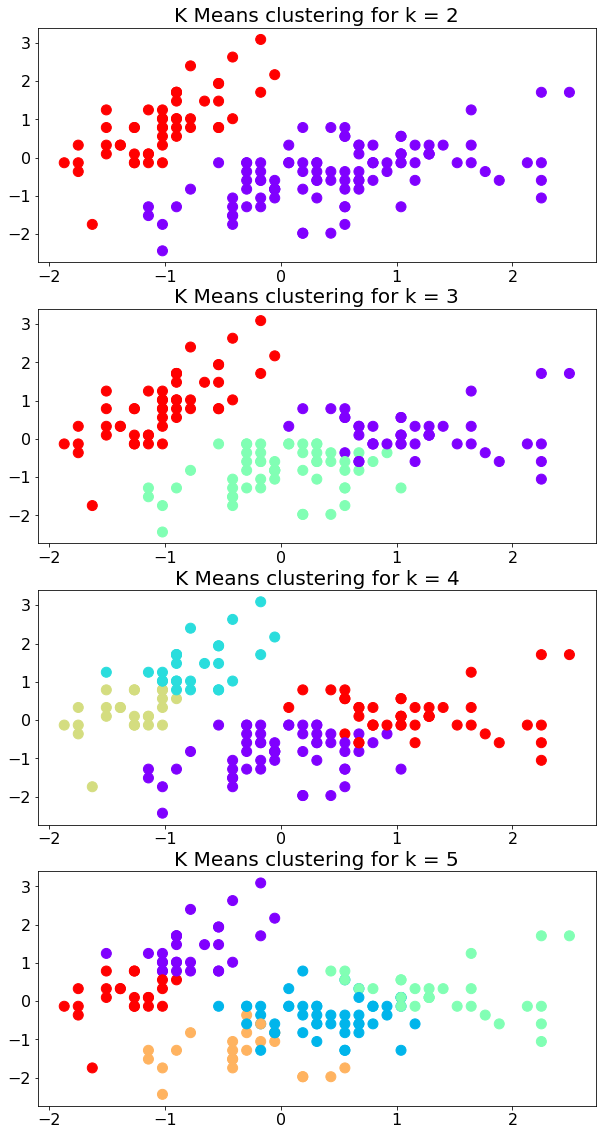

In [4]:
fig = plt.figure(figsize=(10, 25))
for i in range(2,6):
    kM = KMeans(n_clusters=i)
    pred = kM.fit_predict(X)
    acc_KM(X,labels_true, pred)
    
    # Plot the clusters
    plt.subplot(5, 1, i)
    plt.scatter(X[:,0],X[:,1],c=pred,cmap='rainbow',s = 100)
    plt.title(f'K Means clustering for k = {i}', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

### DBSCAN

In [5]:
def dbscan(X,eps,min_samples,labels_true):
    
    # Compute DBSCAN
    db = DBSCAN(eps = eps, metric = 'euclidean', min_samples = min_samples).fit(X)
    labels = db.labels_
    
    # Homogeneity
    hmgnty = metrics.homogeneity_score(labels_true, labels)
    print('Homogeneity = ', hmgnty)
    
    # Completeness
    cmpltnss = metrics.completeness_score(labels_true, labels)
    print('Completeness = ', cmpltnss)
    
    # V-measure
    vmeasr = metrics.v_measure_score(labels_true, labels)
    print('V_measure = ', vmeasr)
    
    # Adjusted Rand Index
    adjrnd = metrics.adjusted_rand_score(labels_true, labels)
    print('Adjusted rand = ', adjrnd)
    
    # Adjusted Mutual Information
    mutinfo = metrics.adjusted_mutual_info_score(labels_true, labels)
    print('Adjusted Mutual Information',mutinfo)
    
    # Silhouette
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

### Plot Function

In [6]:
def dbscan_plot(X,eps, min_samples):
    
    # DBscan fit
    db = DBSCAN(eps = eps, metric = 'euclidean', min_samples = min_samples).fit(X)
    labels = db.labels_
    
    # mask
    co = np.zeros_like(db.labels_, dtype=bool)
    co[db.core_sample_indices_] = True
    
    # unique lables
    unqlbl = set(labels)
    
    # number of clusters
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Color for each cluster
    colors = [plt.cm.autumn(l) for l in np.linspace(0, 1, len(unqlbl))]
       
    fig = plt.figure(figsize=(15, 10))
    
    # Plot
    for i, j in zip(unqlbl, colors):
        if i == -1:
            # Black used for noise.
            j = [0, 0, 0, 1]

        cl = (labels == i)

        xy = X[cl & co]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(j), markersize=15, markeredgecolor='k')

        xy = X[cl & ~co]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(j), markersize=7, markeredgecolor='k')

    plt.title('Number of clusters: %d' % n_clusters_)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

### - DBscan is highly sensetive to the parameter changes

### eps = 0.5 & min_samples = 5

In [7]:
dbscan(X,0.5,5,labels_true)

Homogeneity =  0.5005010857048665
Completeness =  0.522846554194579
V_measure =  0.5114298559522713
Adjusted rand =  0.44209866858859237
Adjusted Mutual Information 0.5051666404374134
Silhouette Coefficient: 0.357


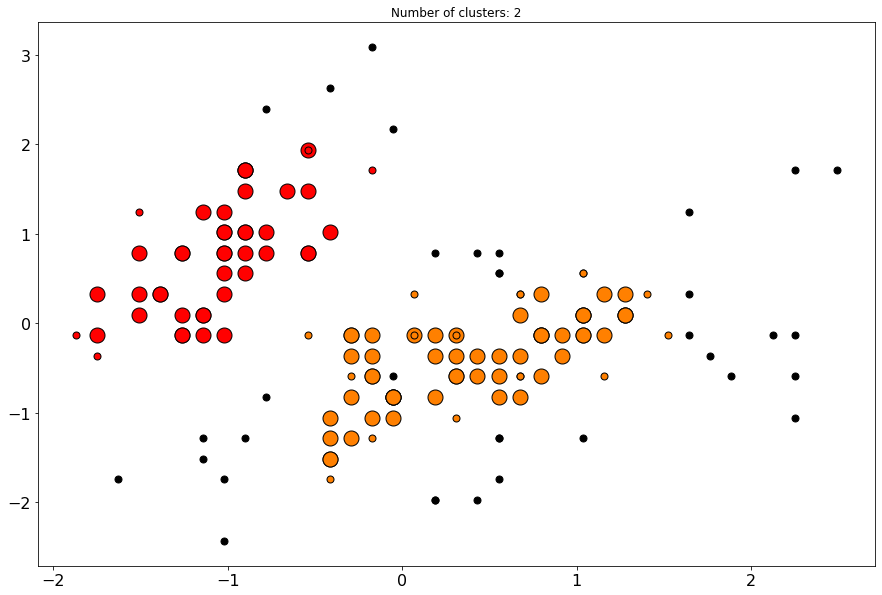

In [8]:
dbscan_plot(X,0.5,5)

### eps = 0.5 & min_samples = 10

In [9]:
dbscan(X,0.5,10,labels_true)

Homogeneity =  0.4563903557594016
Completeness =  0.47441738843318737
V_measure =  0.46522930655950706
Adjusted rand =  0.2791905028336968
Adjusted Mutual Information 0.4545023241843463
Silhouette Coefficient: 0.009


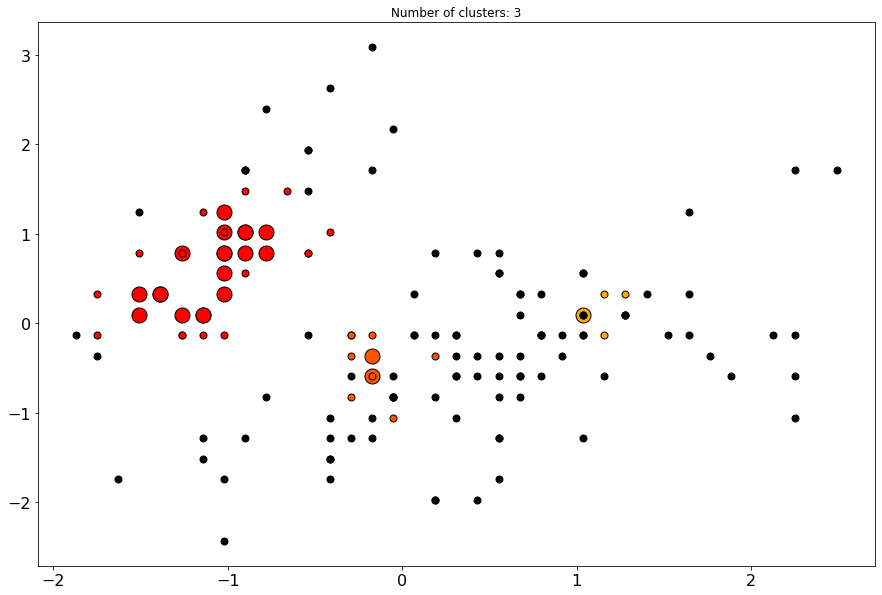

In [10]:
dbscan_plot(X,0.5,10)

### eps = 0.5 & min_samples = 15

In [11]:
dbscan(X,0.5,15,labels_true)

Homogeneity =  0.18065201923053967
Completeness =  0.4632222106066334
V_measure =  0.2599328372551412
Adjusted rand =  0.10448835295587426
Adjusted Mutual Information 0.25319808608322436
Silhouette Coefficient: 0.263


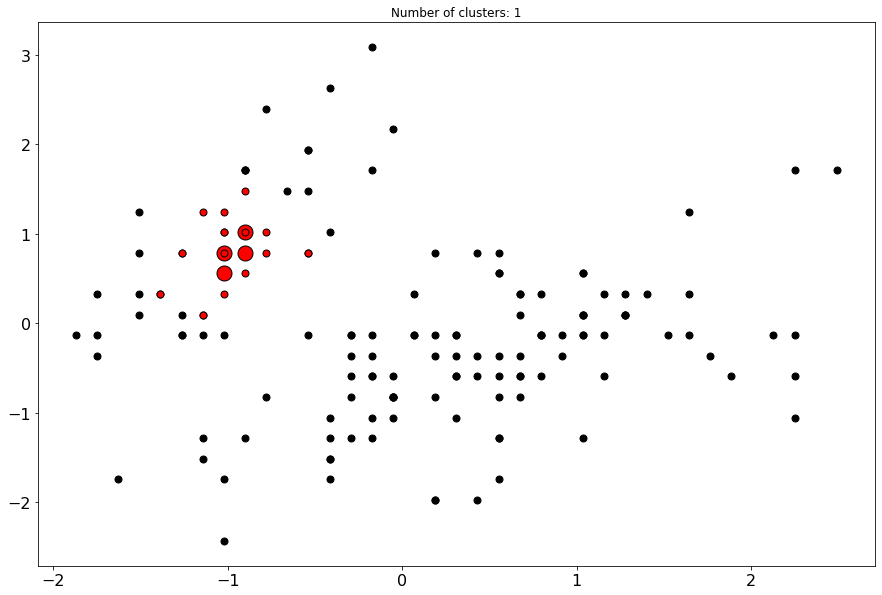

In [12]:
dbscan_plot(X,0.5,15)

### eps = 0.6 & min_samples = 5

In [13]:
dbscan(X,0.6,5,labels_true)

Homogeneity =  0.5180739608524721
Completeness =  0.5656029245001102
V_measure =  0.5407961567255838
Adjusted rand =  0.47062673356811163
Adjusted Mutual Information 0.5347633156769056
Silhouette Coefficient: 0.403


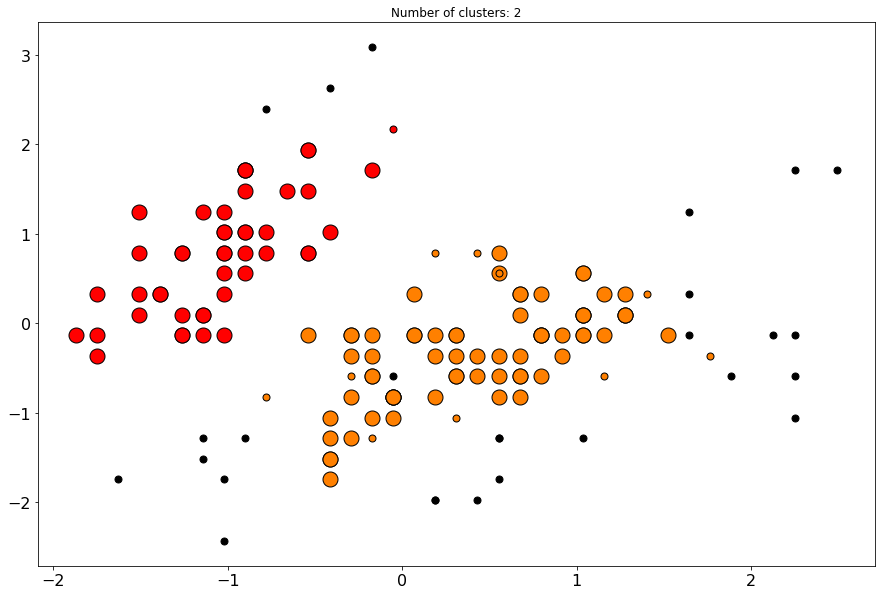

In [14]:
dbscan_plot(X,0.6,5)

### eps = 0.8 & min_samples = 5

In [15]:
dbscan(X,0.8,5,labels_true)

Homogeneity =  0.5786307346837466
Completeness =  0.854392870966849
V_measure =  0.6899788289414183
Adjusted rand =  0.5517553852833211
Adjusted Mutual Information 0.684771434584162
Silhouette Coefficient: 0.522


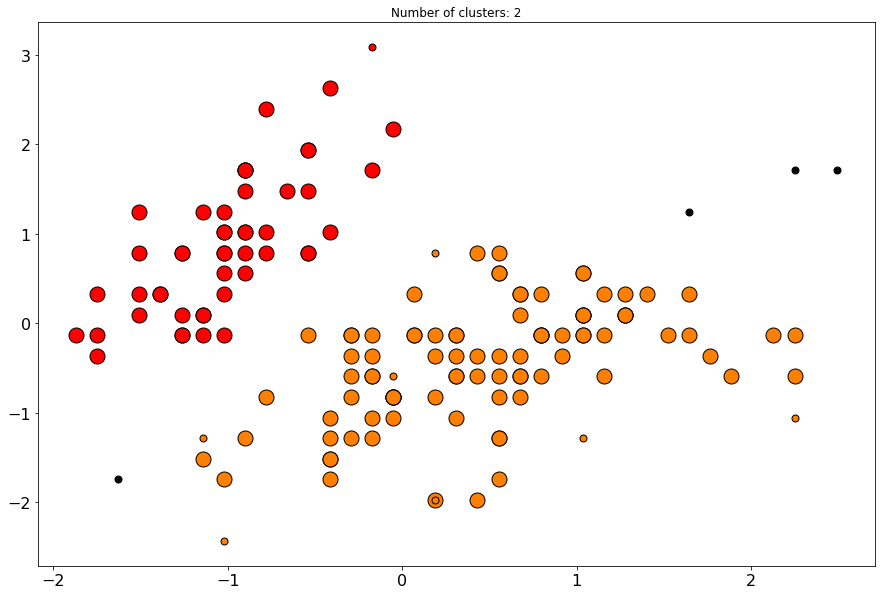

In [16]:
dbscan_plot(X,0.8,5)

### Dataset with different densities

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 8 Text yticklabel objects>)

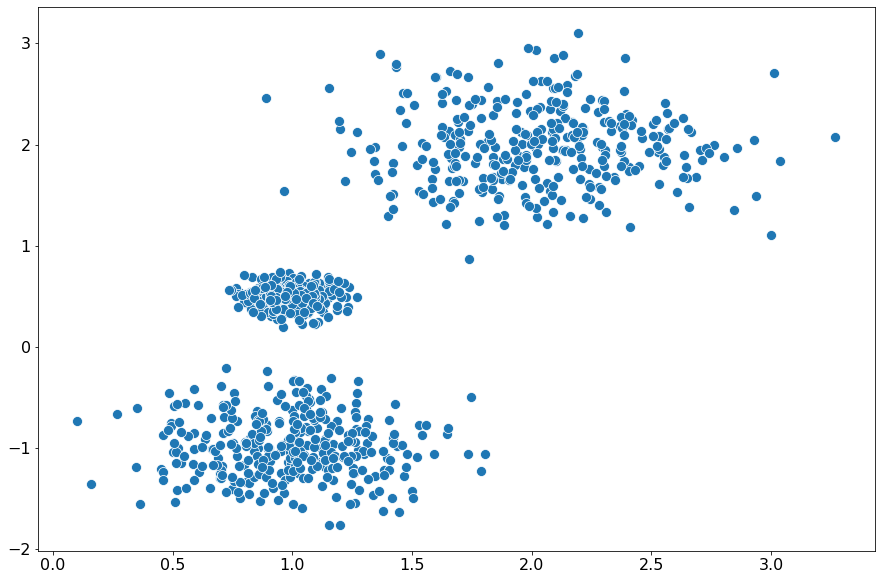

In [17]:
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(X[:,0], X[:,1],s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### - DBScan doesn’t properly work well over clusters with different densities

#### DBSCAN

In [18]:
dbscan(X,0.2,105,labels_true)

Homogeneity =  0.5798004017665548
Completeness =  1.0
V_measure =  0.7340172861308478
Adjusted rand =  0.5716725949351892
Adjusted Mutual Information 0.7337097087878176
Silhouette Coefficient: 0.219


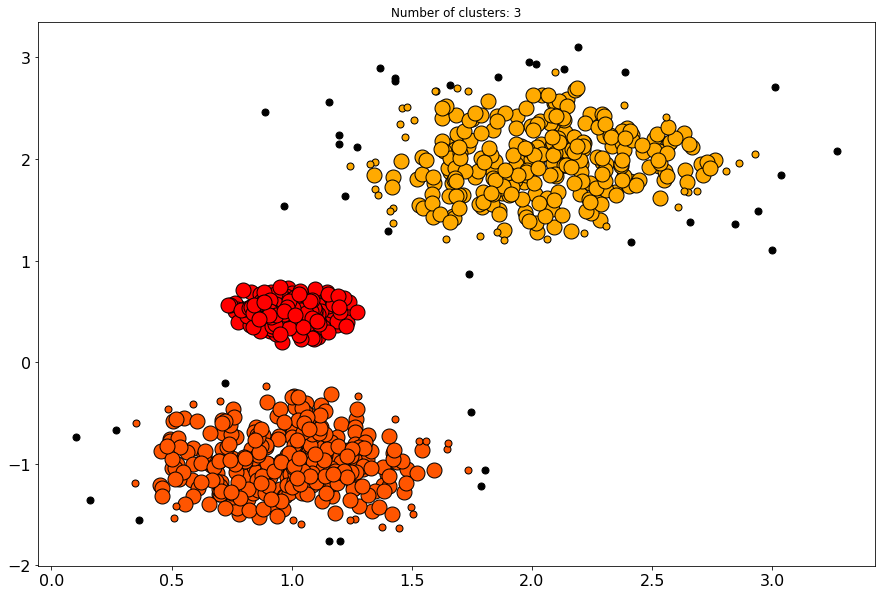

In [19]:
dbscan_plot(X,0.2,10)

### - K-Means algorithm is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.

#### K-Means

Homogeneity =  0.973229099486702
Completeness =  0.9732927133746077
V_measure =  0.9732609053911786
Adjusted rand =  0.9849945164155571
Adjusted Mutual Information 0.9732120060506971
Silhouette Coefficient: 0.712
---------------------------------------------------


(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 8 Text yticklabel objects>)

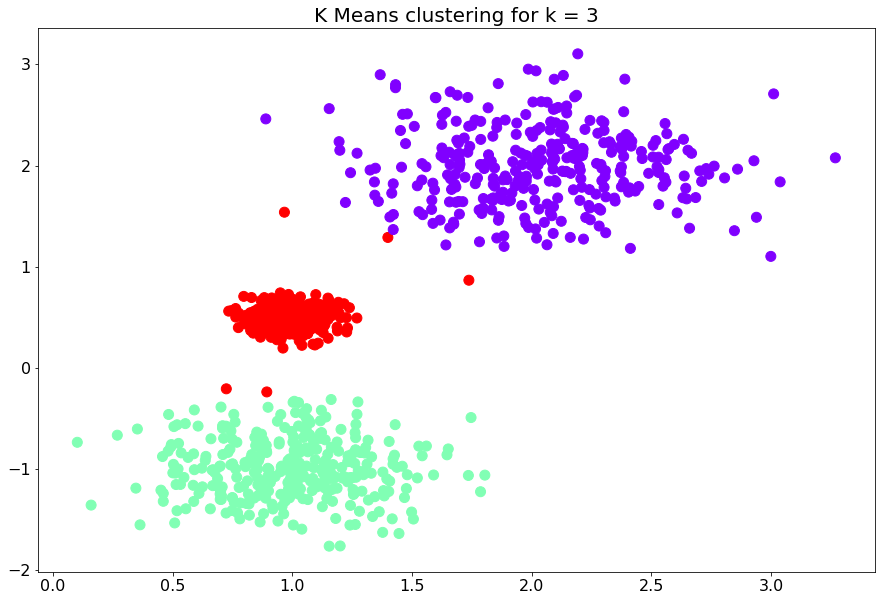

In [20]:
fig = plt.figure(figsize=(15, 10))
kM = KMeans(n_clusters=3)
pred = kM.fit_predict(X)
acc_KM(X,labels_true, pred)
    
# Plot the clusters
plt.scatter(X[:,0],X[:,1],c=pred,cmap='rainbow',s = 100)
plt.title(f'K Means clustering for k = 3', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### Elbow Method


Elbow shows the number of clusters (n) based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. The elbow of the n-SSE plot reveals the optimum number of clusters.


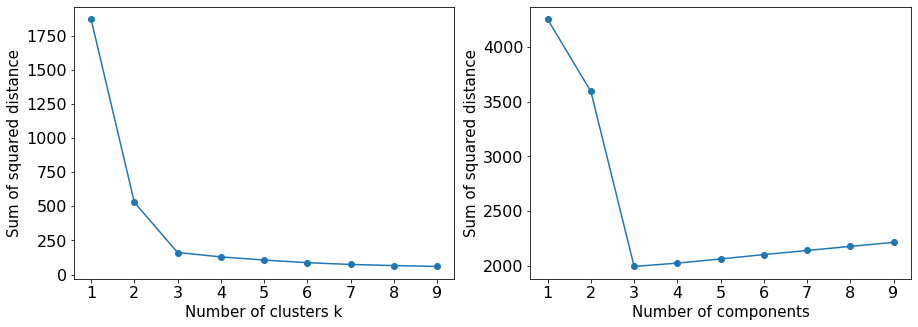

In [21]:
# Run the Kmeans algorithm and get the index of data points clusters
sse_kmean = []
sse_gmm = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k).fit(X)
    sse_kmean.append(km.inertia_)
    gmm = GaussianMixture(n_components=k).fit(X)
    sse_gmm.append(gmm.bic(X))
    
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(list_k, sse_kmean, '-o')
plt.xlabel(r'Number of clusters k',fontsize=15)
plt.ylabel('Sum of squared distance',fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(list_k, sse_gmm, '-o')
plt.xlabel(r'Number of components',fontsize=15)
plt.ylabel('Sum of squared distance',fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

For k-means we are looking for the elbow (here 3) and for the gaussian mixture we are looking for the minimum (here 3).


### Silhouette Analysis

Silhouette analysis is another method to estimate the number of clusters. For each sample we compute the average distance from all data points in the same cluster ($dr_i$), and then the average distance from all data points in the closest cluster ($dc_i$).
The number of clusters for which the coefficient $\frac{dc_i-dr_i}{max(dr_i,dc_i)}\$ is close to 1 we would have good estimate.

### Silhouette samples function for K-Means

In [22]:
def KMeans_silhouette(X,n_clusters):
    for i in range(2,n_clusters+1):
        labels = KMeans(n_clusters = i).fit_predict(X)
        silhouette_values = silhouette_samples(X, labels)
        plot_silhouette(X, labels, silhouette_values)

### Silhouette samples function for GMM

In [23]:
def GMM_silhouette(X,n_clusters):
    for i in range(2,n_clusters+1):
        labels = GaussianMixture(n_components = i).fit_predict(X)
        silhouette_values = silhouette_samples(X, labels)
        plot_silhouette(X, labels, silhouette_values)

### Silhouette Plot function

In [24]:
def plot_silhouette(X, labels, silhouette_values):
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=[15,5])
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_values = silhouette_values[labels == cluster]
        cluster_silhouette_values.sort()
        y_upper += len(cluster_silhouette_values)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_values, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_values)
    
    avg_score = np.mean(silhouette_values)
    ax1.axvline(avg_score, linestyle='--', linewidth=4, color='red')
    ax1.set_title('Silhouette Plot', y=1.02,fontsize=20);
    
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.set_title('Cluster Plot', y=1.02,fontsize=20)
    plt.show()

### K-Means results for k from 2 to 6

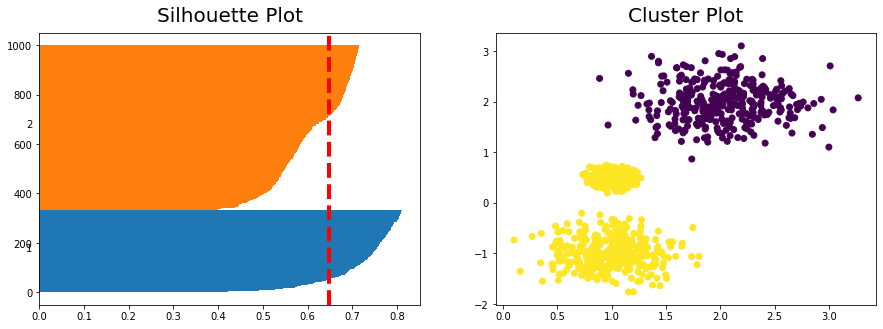

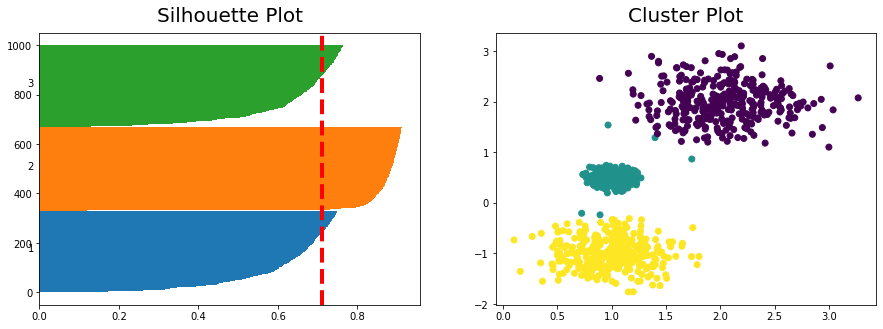

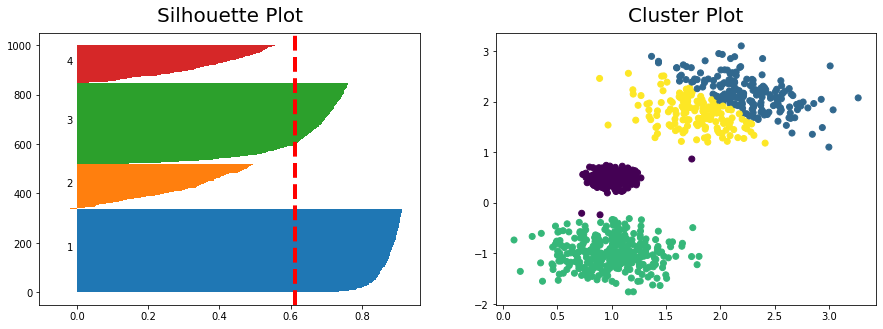

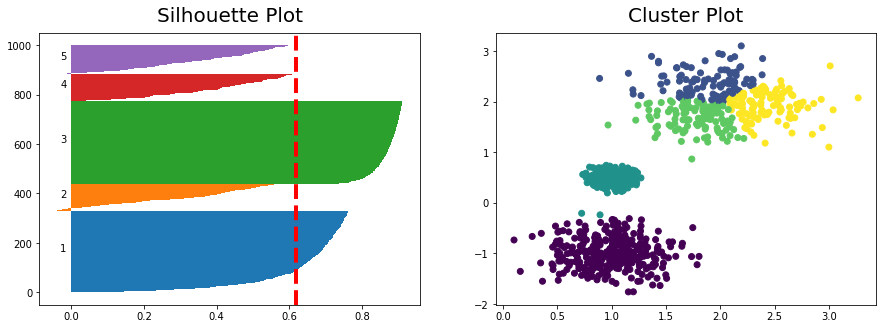

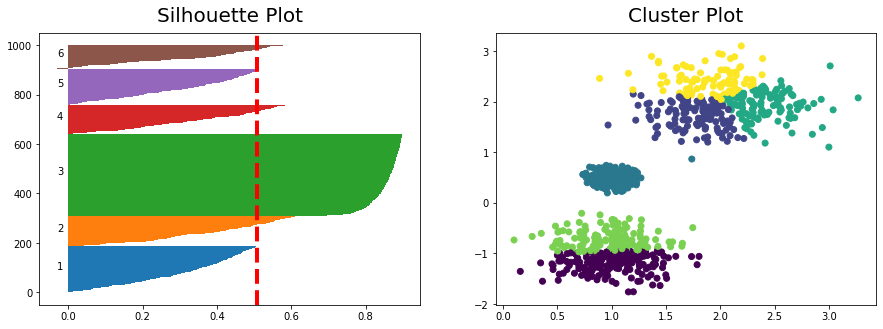

In [25]:
KMeans_silhouette(X,6)

According to the silhouette score and the plot thickness, it seems that number of cluster value of 3 is a good pick for the given data. Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 1 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 2 sub clusters into one big cluster. However when the n_clusters is equal to 3, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right. This the same for GMM silhouette plot too, where 3 clusters seem reasonable answer.


### GMM results for number of components from 2 to 6

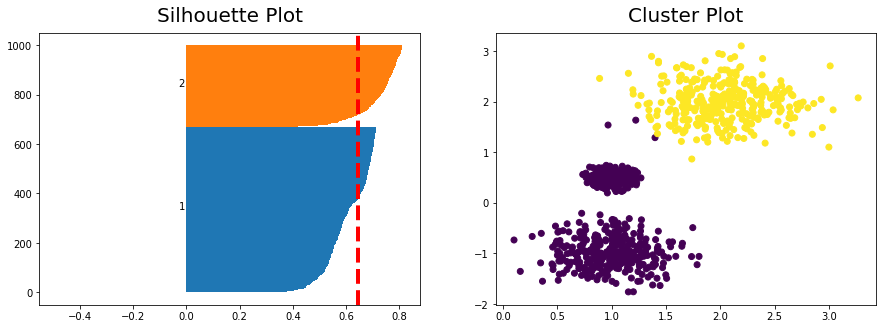

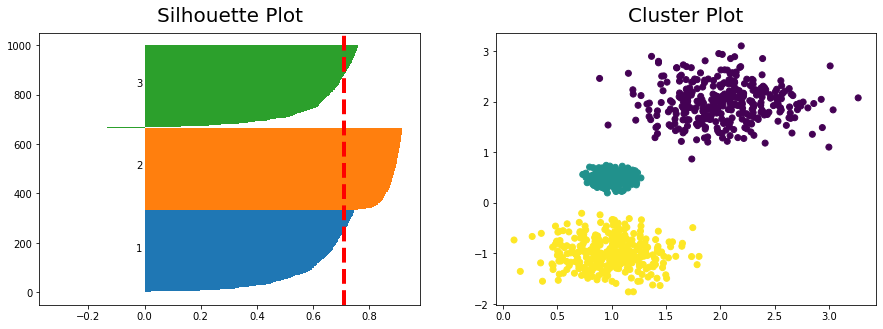

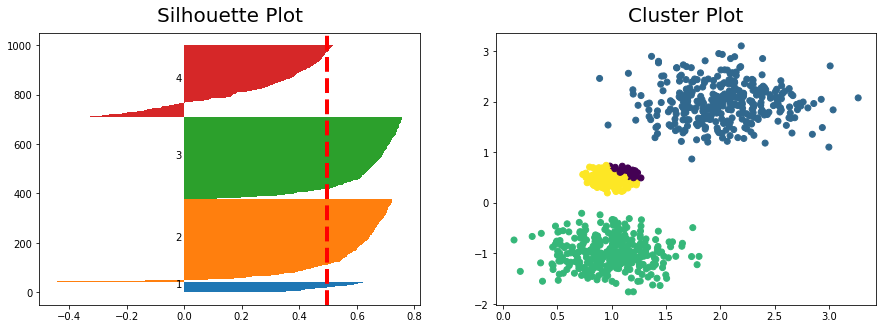

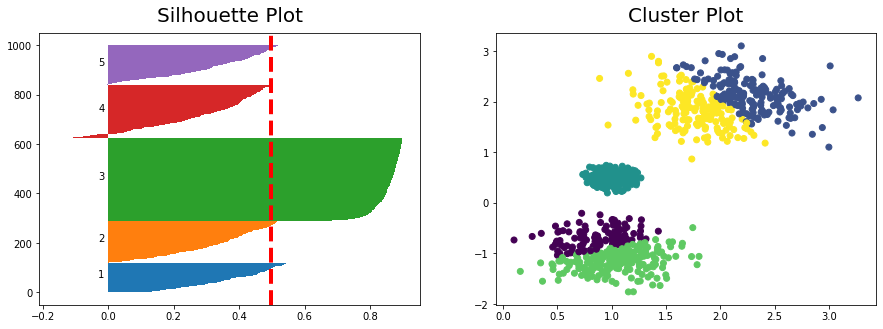

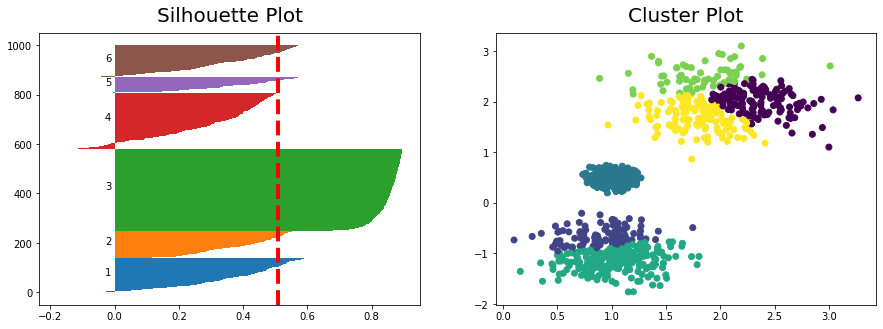

In [26]:
GMM_silhouette(X,6)